In [1]:
import sys
import os
import glob
from PIL import Image
from collections import Counter
from  sklearn.neighbors import NearestNeighbors
from IPython.display import display

sys.path.append(os.path.dirname(os.getcwd()))

from src.img2vec_resnet18 import Img2VecResnet18

In [2]:
# Define the paths and parameters
MODEL_PATH = '../models/best.pt'
DATA_PATH = "../data"
IMG_DIR = '../data/img/image45.jpg'
N_NEIGHBORS = 5

# Get knowledge base images embeddings

In [3]:
# Get a list of image file paths using glob
list_imgs = glob.glob(f"{DATA_PATH}/knowledge_base/croptest/object/**/*.jpg")

# Create an instance of the Img2VecResnet18 model
img2vec = Img2VecResnet18()

# Create empty lists to store classes and embeddings
classes = []
embeddings = []

# Iterate over each image file
for filename in list_imgs:
    # Open the image file
    I = Image.open(filename)
    
    # Get the feature vector representation of the image using img2vec.getVec()
    vec = img2vec.getVec(I)
    
    # Close the image file
    I.close()
    
    # Extract the folder path and name of the image file
    folder_path = os.path.dirname(filename)
    folder_name = os.path.basename(folder_path)
    
    # Append the folder name (class) and feature vector to the lists
    classes.append(folder_name)
    embeddings.append(vec)

# Get distances and more similar products

In [4]:
# Create a NearestNeighbors model and fit it with the embeddings
model_knn = NearestNeighbors(metric='cosine', n_neighbors=N_NEIGHBORS)
model_knn.fit(embeddings)

# Open the target image file
I = Image.open(IMG_DIR)

# Get the feature vector representation of the target image
vec = img2vec.getVec(I)

# Close the target image file
I.close()

# Find the nearest neighbors and distances to the target image
dists, idx = model_knn.kneighbors([vec])

The image has been identified as a BigSized-LemonTea with a 100% probability


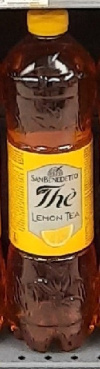

In [5]:
# Get the class labels of the nearest neighbors
brands_nearest_neighbors = [classes[i] for i in list(idx[0])]

# Count the occurrences of each class label
count = Counter(brands_nearest_neighbors)

# Get the most common class and its count
product, n = sorted(count.items(), key=lambda item: item[1])[-1]

# Print the identified product and the probability
print(f"The image has been identified as a {product} with a {n/N_NEIGHBORS:.0%} probability")

# Open the target image again
I = Image.open(IMG_DIR)

# Display the target image
display(I)

# Close the target image file
I.close()